# H3

## 1. Plotting number of hotels per H3

In [ ]:
#!pip install rpy2==3.5.1

In [ ]:
%load_ext rpy2.ipython

In [ ]:
#install.packages("remotes")
#remotes::install_github("crazycapivara/h3-r")

In [ ]:
#%%R
#install.packages("leaflet",  dependencies=TRUE)

In [ ]:
#%%R
#install.packages("tidyverse",  dependencies=TRUE)

In [ ]:
%%R
# load libraries
library(tidyverse)
library(h3)
#library(leaflet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: ‘h3’



    compact




In [ ]:
%%R
# read csv files
hotel <- read.csv("cities.csv") # split df
events <- read.csv("df_events.csv")
lodges <- read.csv("citylodge.csv") # merged

In [ ]:
%%R
# display first 6 rows of the 'hotels' DataFrame
head(hotel)

   id                 store       lat      lng
1 135 CL AIRPORT BARBARA RD -26.13783 28.19336
2 105       CL BLOEMFONTEIN -29.11000 26.20312
3 110          CL BRYANSTON -26.07836 28.01150
4 115             CL DURBAN -29.85105 31.03310
5 120           CL FOURWAYS -26.02417 28.01670
6 125          CL GRANDWEST -33.91865 18.54769


In [ ]:
%%R
# rename 'store' to 'hotel'
hotels <- hotel %>% rename(hotel = store)

# view the info
glimpse(hotels)


Rows: 59
Columns: 4
$ id    <int> 135, 105, 110, 115, 120, 125, 130, 138, 141, 145, 830, 149, 152,…
$ hotel <chr> "CL AIRPORT BARBARA RD", "CL BLOEMFONTEIN", "CL BRYANSTON", "CL …
$ lat   <dbl> -26.13783, -29.11000, -26.07836, -29.85105, -26.02417, -33.91865…
$ lng   <dbl> 28.19336, 26.20312, 28.01150, 31.03310, 28.01670, 18.54769, 28.2…


In [ ]:
%%R
# Concatenate lat and lng columns
hotels$lat_lng <- paste(hotels$lat, hotels$lng, sep = ", ")

# Convert lat_lng_combined to numeric vectors for lat and lng
lat_lng <- as.numeric(unlist(strsplit(hotels$lat_lng, ", ", fixed = TRUE)))

# Create separate vectors for lat and lng
lat <- lat_lng[c(TRUE, FALSE)]
lng <- lat_lng[c(FALSE, TRUE)]

# Convert lat/lng to H3 hexagons
hotels$h3 <- geo_to_h3(lat_lng, res = 7)

# Print the first two rows of the resulting dataframe
print(head(hotels, 2))


   id                 hotel       lat      lng
1 135 CL AIRPORT BARBARA RD -26.13783 28.19336
2 105       CL BLOEMFONTEIN -29.11000 26.20312
                              lat_lng              h3
1 -26.1378343021334, 28.1933555807027 87bcd42f6ffffff
2 -29.1100005591017, 26.2031183535314 8734884b6ffffff


In [ ]:
%%R
num_hotels_per_h3 <- table(hotels$h3)

# make to df
df_num_hotels_per_h3 <- data.frame(h3 = names(num_hotels_per_h3), count = as.numeric(num_hotels_per_h3))

# print DataFrame
print(df_num_hotels_per_h3)


                h3 count
1  87341a016ffffff     1
2  87341d9b6ffffff     1
3  8734884b6ffffff     1
4  87348acb6ffffff     1
5  87348ad8affffff     1
6  87349d368ffffff     1
7  87349dae8ffffff     1
8  8734a99a1ffffff     1
9  8734c0a18ffffff     1
10 8734c1501ffffff     1
11 8734c15a6ffffff     1
12 8734e104dffffff     1
13 8734e1409ffffff     1
14 8734e2244ffffff     1
15 8734e22eeffffff     1
16 8734e2303ffffff     1
17 8734e2351ffffff     1
18 8734e261affffff     1
19 8734e31a5ffffff     1
20 8734e3c4bffffff     1
21 8734e3cd6ffffff     1
22 8734f2aa4ffffff     1
23 8734f2ab2ffffff     1
24 8734f39a8ffffff     1
25 87559a524ffffff     1
26 875624448ffffff     1
27 8757244daffffff     1
28 8757452d8ffffff     1
29 87576ac13ffffff     1
30 87ad12250ffffff     1
31 87ad83b81ffffff     1
32 87ad83bb3ffffff     1
33 87bc01074ffffff     1
34 87bc01152ffffff     1
35 87bc01626ffffff     1
36 87bc0daa9ffffff     1
37 87bc45716ffffff     1
38 87bc72883ffffff     1
39 87bcc32c0ffffff     1


  Each lodge has one distinct H3 hexagon index each.

In [ ]:
#install.packages("geojsonio")

In [ ]:
#install.packages("devtools")
#devtools::install_github("crazycapivara/h3-r")

In [ ]:
#install.packages("remotes")
#remotes::install_github("ropensci/geojsonio")

In [ ]:
#update.packages(ask = FALSE, checkBuilt = TRUE)

In [ ]:
#%%R
#library(sf)
#library(geojsonio)

# Count the number of hotels per H3 hexagon
#num_hotels_per_h3 <- table(hotels$h3)

# Create a dataframe from the table
#df_num_hotels_per_h3 <- data.frame(h3 = names(num_hotels_per_h3), count = as.numeric(num_hotels_per_h3))

# Merge with original 'hotels' dataframe to get lat/lng for each H3 hexagon
#merged_df <- merge(lodges, df_num_hotels_per_h3, by = "h3")

# Convert to sf object
#sf_merged <- st_as_sf(merged_df, coords = c("lng", "lat"))

# Create GeoJSON from sf object
#geojson <- geojson_sf(sf_merged, lat = "lat", lon = "lng", fill = "blue", opacity = 0.5, stroke = FALSE)

# Create a leaflet map
#map <- leaflet() %>%
#  addTiles() %>%
#  addGeoJSON(geojson) %>%
#  addMarkers(data = merged_df, lng = ~lng, lat = ~lat, popup = ~paste(store),
#             group = "Hotels")

# Add layer control to toggle H3 Hexagons and Hotels
#map <- addLayersControl(map, overlayGroups = c("Hotels"), options = layersControlOptions(collapsed = FALSE))

# Display the map
#map


NULL


 > *Unable to install geojson packages, could not check R code for map.

> *Changed to Python, to be able to visualize the map

In [ ]:
#!pip install h3 folium


In [ ]:
import folium
import pandas as pd
import h3

df_cities = pd.read_csv("cities.csv")
df_cities

id                               store        lat        lng
0   135               CL AIRPORT BARBARA RD -26.137834  28.193356
1   105                     CL BLOEMFONTEIN -29.110001  26.203118
2   110                        CL BRYANSTON -26.078360  28.011498
3   115                           CL DURBAN -29.851052  31.033104
4   120                         CL FOURWAYS -26.024169  28.016695
5   125                        CL GRANDWEST -33.918649  18.547694
6   130                         CL HATFIELD -25.749409  28.234840
7   138                     CL KATHERINE ST -26.103678  28.070180
8   141                         CL LYNNWOOD -25.765064  28.277980
9   145                      CL MORNINGSIDE -26.093580  28.055566
10  830                           CL MAPUTO -25.943821  32.609583
11  149                          CL NEWTOWN -26.200389  28.032644
12  152                            CL ORTIA -26.132062  28.229476
13  155                        CL PINELANDS -33.947665  18.490493
14  160                   CL PORT ELIZABETH -33.979702  25.653797
15  178                         CL UMHLANGA -29.725878  31.067560
16  180                   CL V&A WATERFRONT -33.560319  18.260986
17  185                   CL WATERFALL CITY -26.013946  28.110994
18  603                          CY ARCADIA -25.748787  28.227220
19  620                         CL EASTGATE -26.180532  28.106033
20  460                   CY PORT ELIZABETH -33.980268  25.655814
21  660                         CY ROSEBANK -26.144210  28.044269
22  670                          CY SANDTON -26.101923  28.060242
23  490                   CY WATERFALL CITY -26.013263  28.104963
24  337             RL AIRPORT JOHANNESBURG -26.141599  28.191873
25  305                     RL BLOEMFONTEIN -29.098957  26.296444
26  310                    RL CARNIVAL CITY -26.255572  28.317408
27  312                        RL CENTURION -25.865241  28.189612
28  308  RL CAPE TOWN INTERNATIONAL AIRPORT -33.960507  18.598324
29  315                           RL DURBAN -29.852496  31.022217
30  320                      RL EAST LONDON -32.989883  27.892844
31  325                        RL GERMISTON -26.234065  28.186966
32  330                           RL ISANDO -26.139833  28.189554
33  340                        RL KIMBERLEY -28.689203  24.774026
34  350                         RL MBOMBELA -25.477522  30.968160
35  353                          RL N1 CITY -33.890063  18.563742
36  356                 RL PIETERMARITZBURG -29.615871  30.409350
37  359                   RL PORT ELIZABETH -33.980828  25.657209
38  360           RL PORT ELIZABETH AIRPORT -33.983248  25.609816
39  362                    RL POTCHEFSTROOM -26.714333  27.104185
40  365                         RL RANDBURG -26.098528  27.985957
41  367                     RL RICHARDS BAY -28.753234  32.056484
42  366                          RL RIVONIA -26.054414  28.058396
43  368                       RL RUSTENBURG -25.703485  27.254749
44  372                        RL SOUTHGATE -26.266411  27.976621
45  385                         RL UMHLANGA -29.726576  31.068617
46  235             TL AIRPORT JOHANNESBURG -26.140962  28.192115
47  205                        TL BELLVILLE -33.883597  18.633977
48  805                         TL GABORONE -24.606131  25.929515
49  220                           TL GEORGE -33.984406  22.503452
50  225                          RL SANDTON -26.098633  28.062980
51  255                         TL MBOMBELA -25.477125  30.968910
52  245                       TL MENLO PARK -25.774446  28.269557
53  248                        TL WATERFALL -26.008224  28.118299
54  270                        TL POLOKWANE -23.942432  29.422487
55  272                   TL PORT ELIZABETH -33.979151  25.653065
56  280                       TL ROODEPOORT -26.152463  27.924371
57  290                         TL UMHLANGA -29.717046  31.066773
58  835                         TL WINDHOEK -22.620690  17.095855

In [ ]:

# Rename 'store' to 'hotel'
df_cities.rename(columns={'store': 'hotel'}, inplace=True)

# Function to get H3 hexagon index for each row in the DataFrame
def get_h3(row, resolution=7):
    return h3.geo_to_h3(row['lat'], row['lng'], resolution)

# Apply the function to create a new 'h3_index' column
df_cities['h3_index'] = df_cities.apply(get_h3, axis=1)

# Count the number of hotels per H3 hexagon
hotel_count = df_cities['h3_index'].value_counts().reset_index()
hotel_count.columns = ['h3_index', 'hotel_count']

# Create a folium map centered at the mean latitude and longitude
center_lat = df_cities['lat'].mean()
center_lng = df_cities['lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=6)

# Plot hotel count on the map
for _, row in hotel_count.iterrows():
    h3_index = row['h3_index']
    hex_polygon = h3.h3_to_geo_boundary(h3_index)

    # Add the hexagon to the map with popup showing hotel count
    folium.Polygon(locations=hex_polygon, color='blue', fill=True, fill_opacity=0.4,
                   popup=f"Hotel Count: {row['hotel_count']}").add_to(m)

# Display the map
m




## 2. Events EDA

In [ ]:
%%R
# head and info
head(events)
glimpse(events)

Rows: 610
Columns: 11
$ X          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …
$ name       <chr> "mining indaba", "rugby sevens wordcup series", "festival o…
$ venue      <chr> "cticc", "cape town stadium", "kyalami grand prix circuit",…
$ start_date <chr> "2023-02-05", "2022-09-09", "2022-08-26", "2022-10-15", "20…
$ end_date   <chr> "2023-02-09", "2022-09-11", "2022-08-28", "2022-10-16", "20…
$ impact     <chr> "High", "High", "Low", "Low", "Low", "Low", "Low", "Medium"…
$ guests     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ id         <int> 180, 180, 490, 490, 490, 490, 490, 490, 141, 141, 141, 141,…
$ event_id   <chr> "180_20220815175946_1", "180_20220816062444_1", "490_202208…
$ segment    <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ frequency  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…


In [ ]:
%%R
# check NA
na_count <- colSums(is.na(events))

# Display columns with missing values and their counts
print(na_count[na_count > 0])



   guests   segment frequency 
      610        38        38 


In [ ]:
%%R
events %>%
  filter(rowSums(across(everything(), ~is.na(.))) > 0)

events

      X                                                                    name
1     1                                                           mining indaba
2     2                                             rugby sevens wordcup series
3     3                                                    festival of motoring
4     4                                                            bmw mfest 50
5     5                                                      kyalami 9hour 2022
6     6                                                professional beauty expo
7     7                                    16th annual procurement world indaba
8     8                         11th annual africa health exhibition & congress
9     9                                                 agricultural & forestry
10   10                                       aesthetic medicine congress of sa
11   11                                                      afrikaans is groot
12   12                                 

In [ ]:
%%R
# guests
# look at first 15 char
head(events$guests, 15)
# value counts
value_counts <- table(events$guests)
print(value_counts)

< table of extent 0 >


  No entries for the `guest` column

In [ ]:
#%%R
# drop guests column
#events %>%
#  { if (all(is.na(.$guests))) select(., -guests) else . }

      X                                                                    name
1     1                                                           mining indaba
2     2                                             rugby sevens wordcup series
3     3                                                    festival of motoring
4     4                                                            bmw mfest 50
5     5                                                      kyalami 9hour 2022
6     6                                                professional beauty expo
7     7                                    16th annual procurement world indaba
8     8                         11th annual africa health exhibition & congress
9     9                                                 agricultural & forestry
10   10                                       aesthetic medicine congress of sa
11   11                                                      afrikaans is groot
12   12                                 

In [ ]:
%%R
# segment
# look at first 15 char
head(events$segment, 15)
# unique values from the 'segment' column
seg_uniq <- unique(events$segment)
print(seg_uniq)

 [1] NA               "Leisure"        "OTA"            "Government"    
 [5] "Corporate"      "BAR"            "BAR-%"          " STO/Wholesale"
 [9] "Niche"          "Airlines"      


  BAR and BAR-%

In [ ]:
%%R
# frequency
# look at last 15 char
tail(events$frequency, 15)
# unique values from the 'frequency' column
freq_uniq <- unique(events$frequency)
print(freq_uniq)

[1] NA        "Other"   "Yearly"  "Monthly" "Weekly" 


### 2.1 Data Validation and Cleaning

In [ ]:
%%R
# check for duplicates
duplicates <- events[duplicated(events), ]
print(duplicates)

 [1] X          name       venue      start_date end_date   impact    
 [7] guests     id         event_id   segment    frequency 
<0 rows> (or 0-length row.names)


  No duplicated entries.
  

In [ ]:
%%R
# fix datatypes

# convert 'start_date' and 'end_date' to date format
events$start_date <- as.Date(events$start_date)
events$end_date <- as.Date(events$end_date)

# check datatypes
str(events[c("start_date", "end_date")])

'data.frame':	610 obs. of  2 variables:
 $ start_date: Date, format: "2023-02-05" "2022-09-09" ...
 $ end_date  : Date, format: "2023-02-09" "2022-09-11" ...


  `start-date` and `end-date` changed from character type to date


In [ ]:
%%R
# change "BAR-%" to "NO BAR" in segment

events <- events %>%
  mutate(segment = ifelse(segment == "BAR-%", "NO BAR", segment))
# check
segm_uniq <- unique(events$segment)
print(segm_uniq)

 [1] NA               "Leisure"        "OTA"            "Government"    
 [5] "Corporate"      "BAR"            "NO BAR"         " STO/Wholesale"
 [9] "Niche"          "Airlines"      


## 2.2 Exploration


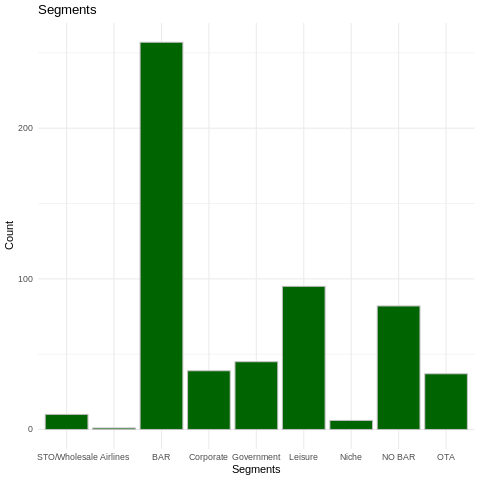

In [ ]:
%%R
# check if 'events' is a dataframe, if not, convert
if (!is.data.frame(events)) {
  events <- as.data.frame(events)
}

# Create a barplot of the 'segment' column
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=200)
ggplot(data= subset(events, !is.na(segment)), aes(x = segment)) +
  geom_bar(fill = "darkgreen", color = "gray") +
  labs(title = "Segments", x = "Segments", y = "Count") +
  theme_minimal()


  Prominent segment was BAR.

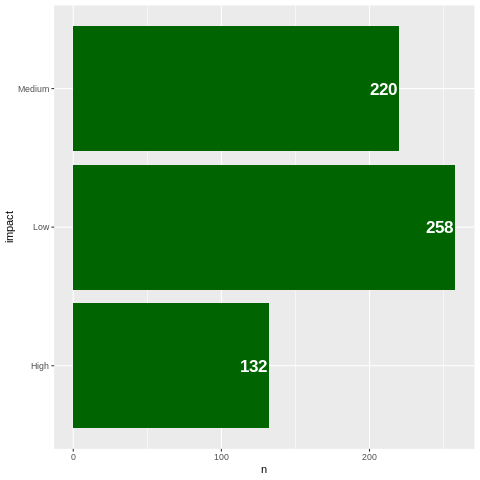

In [ ]:
%%R
# count of impact
count_impact <- events|> count(impact)
count_impact

# bar plot
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=200)
ggplot(
  data = count_impact,
  mapping = aes(y=impact)
  ) +
  geom_col(
    mapping = aes(x = n),
    fill = 'darkgreen'
  ) +
  geom_text(
  mapping = aes(
    y = impact,
    x = n - 10.5,
    label = n
  ),
  size = 6,
  color= 'white',
  fontface= 'bold',
)

  Most of the events were not that impactful.

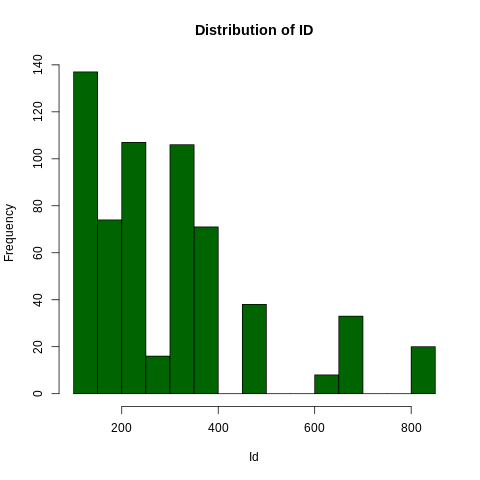

In [ ]:
%%R
events$id <- as.numeric(events$id)

# Occurances of events by id
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=200)
hist(events$id, col = "darkgreen", border = "black", main = "Distribution of ID", xlab = "Id", ylab = "Frequency")


  The distribution of the ids show noticeable variations. Nevertheless, certain IDs appear repeatedly, indicating that some events occur regularly or repetitively at the same venues.

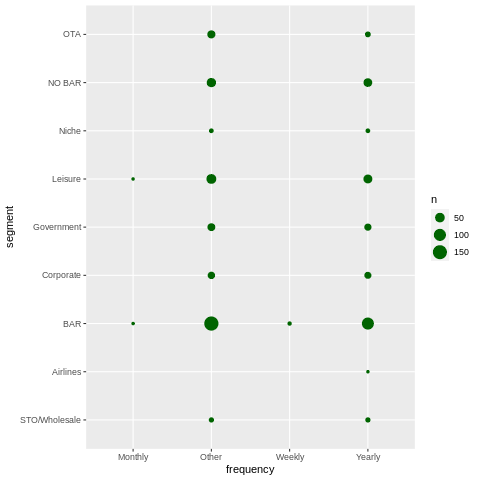

In [ ]:
%%R
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=200)
ggplot(data= subset(events, !is.na(segment))) +
  geom_count(mapping = aes(x = frequency, y = segment), col="darkgreen")

  About 150 occurances were observed in the BAR segment at an unspecified frequency and also on an annual basis.  

In [ ]:
%%R
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=200)

events %>%
  count(name, venue) %>%
  arrange(desc(n)) %>%
  slice_head(n = 10) %>%
  ggplot(
         mapping = aes(x = name, y = venue, fill = n)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightgreen", high = "darkgreen") +
  labs(title = "Top 10 Events by Venue", x = "Name", y = "Venue", fill = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))





  Top events were : africa focus, afrikaans ia groot, kaapsehoop marathon, saica, and the school holiday.


In [ ]:
%%R
# extract year and month from start_date
events <- events %>%
  mutate(year = lubridate::year(start_date),
         month = lubridate::month(start_date, label = TRUE))

# define colors for each year
year_colors <- c("2022" = "lightgreen", "2023" = "darkgreen")

# make a plot
events %>%
  count(year, month, name) %>%
  group_by(year, month) %>%
  summarise(total_names = n()) %>%
  ggplot(mapping = aes(x = month, y = total_names, fill = factor(year))) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = year_colors) +
  labs(title = "Events by Year and Month (Start)",
       x = "Month",
       y = "Total Events",
       fill = "Year") +
  theme(axis.text.x = element_text(hjust = 1))


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


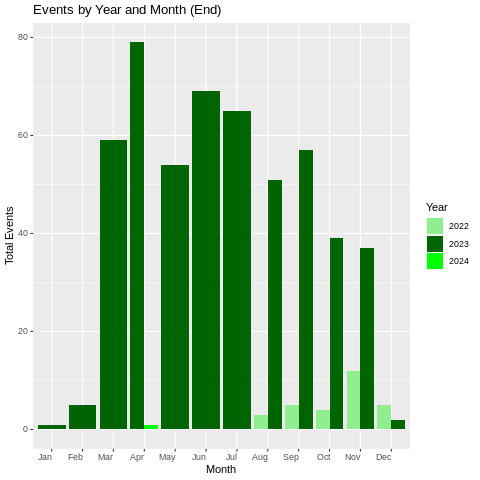

In [ ]:
%%R
# extract year and month from end_date
events <- events %>%
  mutate(year = lubridate::year(end_date),
         month = lubridate::month(end_date, label = TRUE))

# define colors for each year
year_colors <- c("2022" = "lightgreen", "2023" = "darkgreen", "2024" = "green")

# make a plot
events %>%
  count(year, month, name) %>%
  group_by(year, month) %>%
  summarise(total_names = n()) %>%
  ggplot(mapping = aes(x = month, y = total_names, fill = factor(year))) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = year_colors) +
  labs(title = "Events by Year and Month (End)",
       x = "Month",
       y = "Total Events",
       fill = "Year") +
  theme(axis.text.x = element_text(hjust = 1))


 Many events took place or are due to take place in 2023, these events follwed a clear pattern. The early months, January and February, were quieter as usual. March, April, and June, however, saw increased activity. March featured an array festivals, like the annual Cape Town Festival and has the Human Rights Public Holiday on March 21st. April has many public holidays like Good Friday, Family Day, and Freedom Day. In June, despite the cold weather, school holidays and Youth Day made it a hotspot for events. These months, with their public holidays, became strategic times for organizers to plan and host various events.

In [ ]:
%%R
# Convert date strings to Date objects
date_diff <- events %>%
  mutate(start_date = as.Date(start_date, format="%Y-%m-%d"),
         end_date = as.Date(end_date, format="%Y-%m-%d"))

# Calculate the difference in days
date_diff <- events %>%
  mutate(difference_in_days = as.numeric(difftime(end_date, start_date, units = "days")))

# Print the resulting dataframe
head(date_diff)


  X                        name                       venue start_date
1 1               mining indaba                       cticc 2023-02-05
2 2 rugby sevens wordcup series           cape town stadium 2022-09-09
3 3        festival of motoring  kyalami grand prix circuit 2022-08-26
4 4                bmw mfest 50  kyalami grand prix circuit 2022-10-15
5 5          kyalami 9hour 2022  kyalami grand prix circuit 2022-12-01
6 6    professional beauty expo gallagher convention centre 2022-08-28
    end_date impact guests  id             event_id segment frequency year
1 2023-02-09   High     NA 180 180_20220815175946_1    <NA>      <NA> 2023
2 2022-09-11   High     NA 180 180_20220816062444_1    <NA>      <NA> 2022
3 2022-08-28    Low     NA 490 490_20220816065617_1    <NA>      <NA> 2022
4 2022-10-16    Low     NA 490 490_20220816065705_1    <NA>      <NA> 2022
5 2022-12-04    Low     NA 490 490_20220816065943_1    <NA>      <NA> 2022
6 2022-08-29    Low     NA 490 490_20220816072242_1  

In [ ]:
%%R
# box plot of date difference
ggplot(data = date_diff) +
  geom_boxplot(mapping = aes(x = difference_in_days))

In [ ]:
%%R
value_counts <- table(date_diff$difference_in_days)
value_counts


  0   1   2   3   4   5   6   7   8   9  10  11  14  15  22  24  32  64  65  96 
183 106 151  72  35  23  12   3   5   4   3   3   1   1   1   1   2   1   1   1 
322 
  1 


In [ ]:
%%R
# look at the entry with 322 days
target_value <- 322

# find row where the value is present
matching_row <- date_diff[date_diff$difference_in_days == target_value, ]

# print entire row
if (nrow(matching_row) > 0) {
  cat("The value", target_value, "is present in the following row:\n")
  print(matching_row)
} else {
  cat("The value", target_value, "is not present in the column.\n")
}


The value 322 is present in the following row:
      X          name           venue start_date   end_date impact guests  id
465 465 karaoke night flamingo casino 2023-06-08 2024-04-25    Low     NA 340
                event_id segment frequency year month difference_in_days
465 340_20230603171729_1     BAR    Weekly 2024   Apr                322


  Typically, events span 0 to 4 days, with occasional exceptions lasting 6 to 11 days. In rare instances, certain events extend from 14 to 96 days. There's a unique exception: the karaoke night at Flamingo Casino in Kimberly, which lasts an extraordinary 322 days, though it's recorded on a weekly basis rather than daily.

In [ ]:
%%R
date_diff$difference_in_days <- as.numeric(date_diff$difference_in_days)

# Occurances of events by id
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=200)
hist(date_diff$difference_in_days, col = "darkgreen", border = "black", main = "Distribution of Days", xlab = "Days", ylab = "Frequency")